#a)Exploración inicial: 

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Importamos el dataset

dataset_hotels_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
dataset_hotels_train = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')


In [ ]:
dataset_hotels_test.head(1)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e


In [ ]:
dataset_hotels_train.head(1)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1


In [ ]:
dataset_hotels_train.shape

(61913, 32)

In [ ]:
dataset_hotels_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.50,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.00,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.00,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.00,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.00,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,NaN,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,NaN,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,NaN,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


In [ ]:
dataset_hotels_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

In [ ]:
dataset_hotels_test.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id']

## Tipo de variable: 

###Los tipos de variables del dataset hotels_test son:

In [ ]:
dataset_hotels_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           26535 non-null  object 
 1   lead_time                       26535 non-null  int64  
 2   arrival_date_year               26535 non-null  int64  
 3   arrival_date_month              26535 non-null  object 
 4   arrival_date_week_number        26535 non-null  int64  
 5   arrival_date_day_of_month       26535 non-null  int64  
 6   stays_in_weekend_nights         26535 non-null  int64  
 7   stays_in_week_nights            26535 non-null  int64  
 8   adults                          26535 non-null  int64  
 9   children                        26535 non-null  float64
 10  babies                          26535 non-null  int64  
 11  meal                            26535 non-null  object 
 12  country                         

####Y del dataset hotels_train son: 

In [ ]:
dataset_hotels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

##● Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda, etc (Respuesta):

###Para las del dataset hotels_train las medidas de resumen son: 

In [ ]:
dataset_hotels_train.describe(include='all')

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
count,61913,61913.000000,61913.000000,61913,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,...,54023.000000,3152.000000,61913.000000,61913,61913.000000,61913.000000,61913.000000,61913,61913,61913.000000
unique,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,915,61913,NaN
top,City Hotel,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Transient,NaN,NaN,NaN,2015-10-21,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,NaN
freq,42129,NaN,NaN,7176,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,47449,NaN,NaN,NaN,1013,1,NaN
mean,NaN,112.248187,2016.154749,NaN,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,...,84.541010,188.539340,2.638977,NaN,102.383773,0.049957,0.523703,NaN,NaN,0.499750
std,NaN,110.717953,0.708389,NaN,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,...,109.523772,129.457025,18.619092,NaN,47.757640,0.221023,0.775412,NaN,NaN,0.500004
min,NaN,0.000000,2015.000000,NaN,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,23.000000,2016.000000,NaN,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,...,9.000000,67.000000,0.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,NaN,78.000000,2016.000000,NaN,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,...,12.000000,179.000000,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,NaN,172.000000,2017.000000,NaN,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,...,208.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,1.000000


####Y para el del dataset hotels_test son: 

In [ ]:
dataset_hotels_test.describe(include='all')

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
count,26535,26535.000000,26535.000000,26535,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,...,26535,23172.000000,1317.000000,26535.000000,26535,26535.000000,26535.000000,26535.000000,26535,26535
unique,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,886,26535
top,City Hotel,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,2015-10-21,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
freq,18295,NaN,NaN,3115,NaN,NaN,NaN,NaN,NaN,NaN,...,22112,NaN,NaN,NaN,20310,NaN,NaN,NaN,422,1
mean,NaN,112.066516,2016.161673,NaN,27.183908,15.783682,0.928660,2.520595,1.870737,0.100622,...,NaN,82.753711,188.217160,2.387337,NaN,102.640680,0.045902,0.515621,NaN,NaN
std,NaN,110.151002,0.711078,NaN,13.468782,8.771971,1.005711,1.901415,0.631651,0.391135,...,NaN,109.150519,135.133925,17.353234,NaN,57.395732,0.209995,0.765220,NaN,NaN
min,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,23.000000,2016.000000,NaN,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,NaN,9.000000,61.000000,0.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN
50%,NaN,79.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,NaN,10.000000,174.000000,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN
75%,NaN,171.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,NaN,191.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


El mode es el top, y freq es cuantas veces se repite el top <br>
El mean es la media, y el 50% es la mediana


##● Variables Cualitativas: reportar los posibles valores que toman y cuán frecuentemente lo hacen.

###Los posibles valores que toman los vamos a mostrar de manera gráfica con un countplot. En este caso, solo vamos aplicar un value_counts() de las variables cualitativas correspondies.

In [ ]:
columnas_objeto = dataset_hotels_train.select_dtypes(include=["object"])

In [ ]:
for col in columnas_objeto: 
  print(dataset_hotels_train[col].value_counts())

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64
A    45134
D    

Vamos a verificar si reserved_room_type y assigned_room_type poseen algun tipo de orden:

In [ ]:
# Verificar si los valores tienen un orden natural
def verificar_tamanio(tamanos_unicos):
  if (tamanos_unicos.all() == ['A','B','C','D','E','F','G','H','I','K','P','L']):
    print('La variable tamaño es ordinal')
  else:
      print('La variable tamaño es nominal')

In [ ]:
tamanos_unicos_1 = dataset_hotels_train['reserved_room_type'].unique()
tamanos_unicos_2 = dataset_hotels_train['assigned_room_type'].unique()
verificar_tamanio(tamanos_unicos_1)
verificar_tamanio(tamanos_unicos_2)

La variable tamaño es nominal
La variable tamaño es nominal


Vamos a verificar '

## Variables irrelevantes

arrival_date_week_number <br>

### Pueder ser deducidas con <br>

arrival_date_year <br>
arrival_date_month <br>
arrival_date_day_of_month

---

stays_in_weekend_nights <br>
stays_in_week_nights <br>

podrian ser deducidas con una nueva variable `stays` (que indicaria cuantos dias se quedaria) junto con 

arrival_date_year <br>
arrival_date_month <br>
arrival_date_day_of_month




En el conjunto de datos proporcionado, algunas columnas pueden ser redundantes dependiendo del propósito del análisis.


---


Primero, la columna "id" parece ser una simple identificación numérica de cada registro y, por lo tanto, es poco probable que proporcione información útil para el análisis.


---


Además, las columnas "reserved_room_type" y "assigned_room_type" pueden proporcionar información similar, ya que ambas indican el tipo de habitación reservada o asignada al huésped. Si el análisis solo necesita una de estas variables, la otra podría ser redundante.


---


La columna "previous_bookings_not_canceled" también podría ser redundante si se tiene en cuenta que la información contenida en ella podría ser inferida a partir de la columna "previous_cancellations". Si un huésped ha tenido reservas canceladas anteriormente, es seguro suponer que las reservas no canceladas son simplemente la diferencia entre el total de reservas y las canceladas.

---

Por último, las columnas "agent" y "company" podrían ser redundantes si la mayoría de las reservas son realizadas por clientes individuales en lugar de agencias de viajes o empresas. Si la información de estas columnas no es relevante para el análisis, se podría considerar su eliminación.

---

Es importante tener en cuenta que la identificación de columnas redundantes depende del propósito del análisis y de la información disponible. Por lo tanto, es fundamental realizar un análisis cuidadoso de los datos para determinar qué variables son relevantes y cuáles podrían ser redundantes.

--- 

reservation_status_date: reservation_status puede ser suficiente si no se necesita la fecha

## Las Correlaciones

In [ ]:
dataset_hotels_test.corr()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.014529,0.134443,-0.003548,0.046665,0.122036,0.113133,-0.044944,-0.014273,-0.115174,0.095113,-0.070765,-0.010988,-0.083384,0.144709,0.155820,-0.082418,-0.121458,-0.123584
arrival_date_year,0.014529,1.000000,-0.537801,-0.004223,0.018131,0.034749,0.028070,0.066171,-0.006607,-0.009914,-0.142753,0.025365,0.031264,0.069158,0.278419,-0.053765,0.191050,-0.013861,0.097104
arrival_date_week_number,0.134443,-0.537801,1.000000,0.056159,0.022011,0.006792,0.020403,-0.000780,0.000578,-0.028038,0.041599,-0.026463,0.002497,-0.022151,-0.070409,0.009208,0.051099,-0.005463,0.030243
arrival_date_day_of_month,-0.003548,-0.004223,0.056159,1.000000,-0.022917,-0.041277,-0.009373,0.020789,-0.002706,0.001560,-0.023055,-0.005707,0.010399,-0.006448,0.038648,0.008323,0.030647,0.009973,-0.006268
stays_in_weekend_nights,0.046665,0.018131,0.022011,-0.022917,1.000000,0.495218,0.074591,0.064428,0.008836,-0.077392,-0.013555,-0.041256,0.094465,0.148235,0.057012,-0.056780,0.045171,-0.008406,0.078357
stays_in_week_nights,0.122036,0.034749,0.006792,-0.041277,0.495218,1.000000,0.079065,0.055642,0.017335,-0.090515,-0.016039,-0.046585,0.125698,0.188942,0.196655,-0.010078,0.052685,-0.016243,0.077220
adults,0.113133,0.028070,0.020403,-0.009373,0.074591,0.079065,1.000000,0.022749,0.009406,-0.126107,-0.003253,-0.090951,-0.034234,-0.037082,0.205601,-0.011702,0.166297,0.006945,0.101330
children,-0.044944,0.066171,-0.000780,0.020789,0.064428,0.055642,0.022749,1.000000,0.027285,-0.032554,-0.028305,-0.018545,0.035740,0.043038,0.015073,-0.035393,0.284473,0.041958,0.075713
babies,-0.014273,-0.006607,0.000578,-0.002706,0.008836,0.017335,0.009406,0.027285,1.000000,-0.004210,-0.007356,-0.005022,0.069212,0.029791,0.012303,-0.008830,0.016345,0.037583,0.086395
is_repeated_guest,-0.115174,-0.009914,-0.028038,0.001560,-0.077392,-0.090515,-0.126107,-0.032554,-0.004210,1.000000,0.073058,0.412606,0.014111,0.018823,-0.247915,-0.021707,-0.110534,0.085346,0.025990


In [ ]:
dataset_hotels_train.corr()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


## Distribuciones

### Aca tenemos 2 alternativas

Dejamos las 2 porque una es mas clara, per la otra incluye el Kernel Density Estimation (KDE)

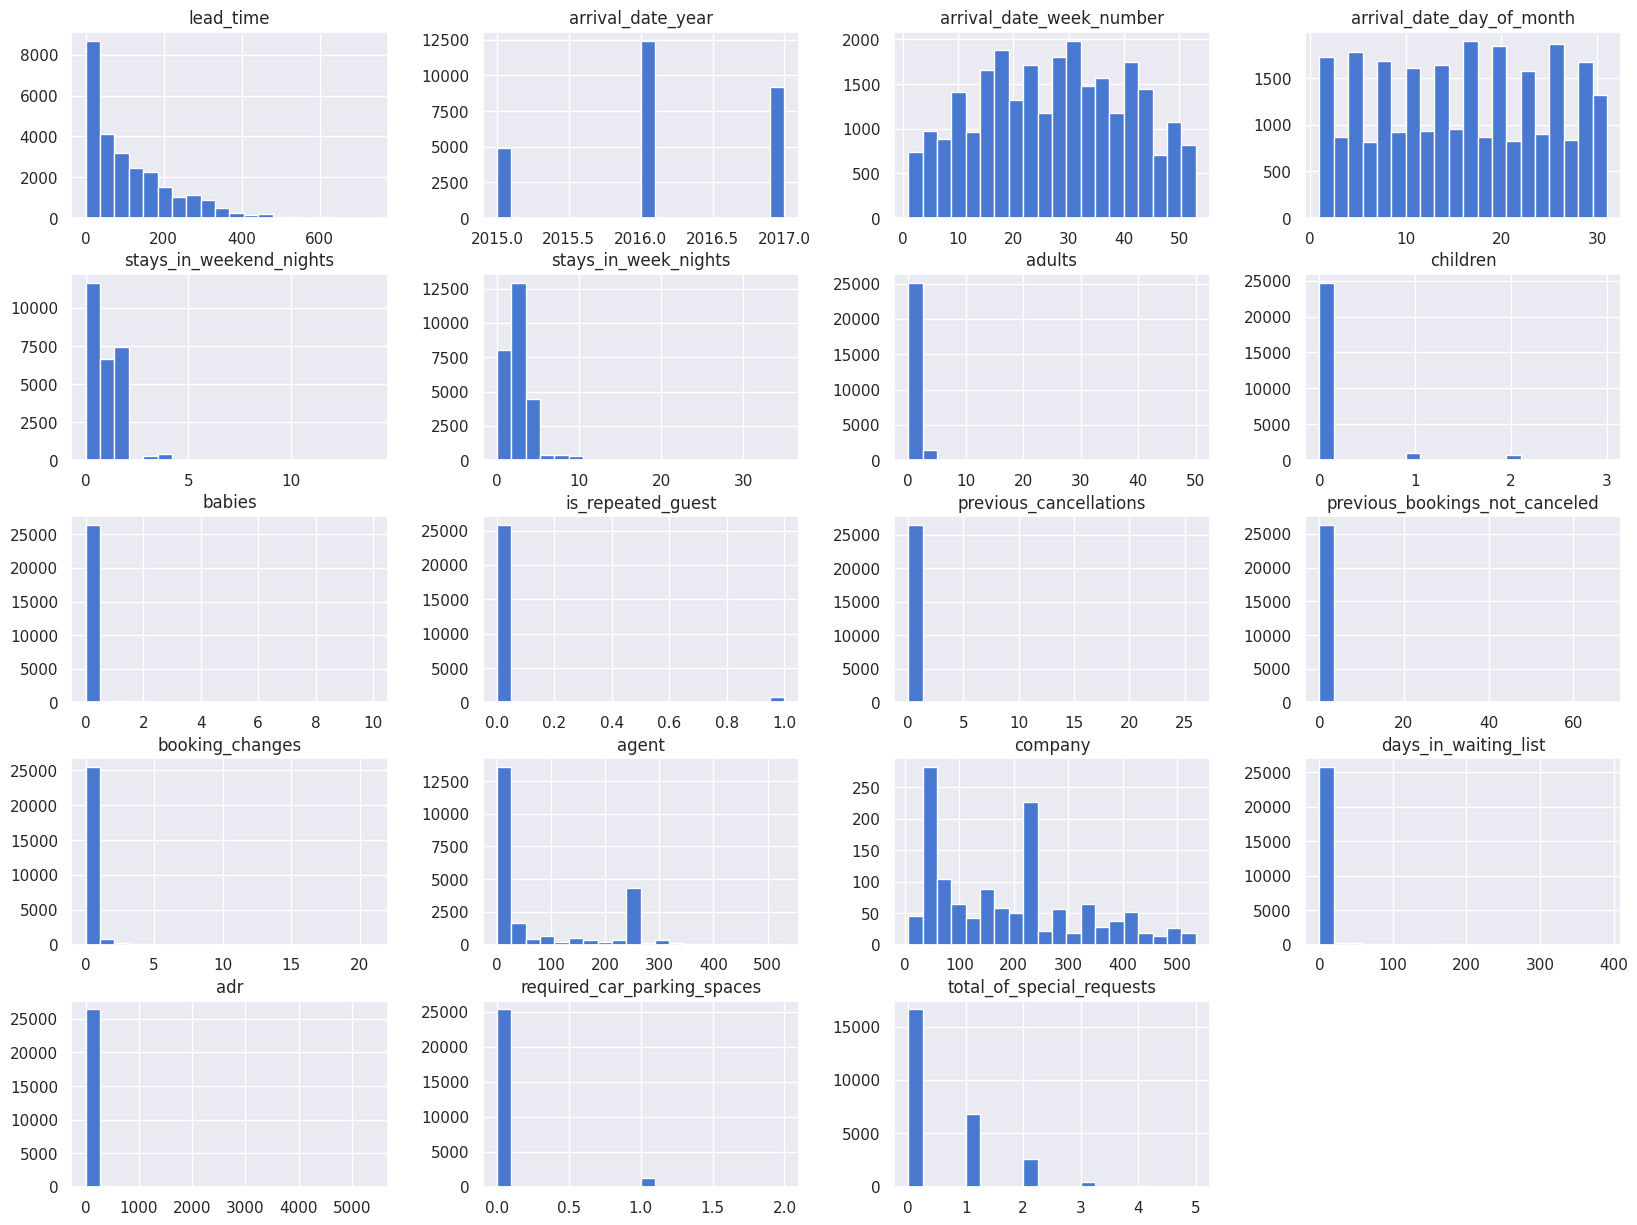

In [ ]:
numeric_cols_hotels = dataset_hotels_test.select_dtypes(include='number')

# Establecer el estilo de Seaborn
sns.set(style="darkgrid", palette="muted")

# Plot histogramas de las columnas numericas
numeric_cols_hotels.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
def plotKDE(dataset):
    # Crear una figura y un eje para la trama
    fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

    # Aplanar el arreglo de ejes
    axes = ax.flatten()

    # Recorrer cada columna y trazar la distribución
    for i, col in enumerate(dataset.columns):
        sns.histplot(data=dataset, x=col, kde=True, ax=axes[i], alpha=0.7)
        axes[i].set_title(col)

    # Eliminar los subplots no utilizados
    for j in range(len(dataset.columns), len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el espaciado entre los subplots
    fig.tight_layout()

    # Mostrar la trama
    plt.show()

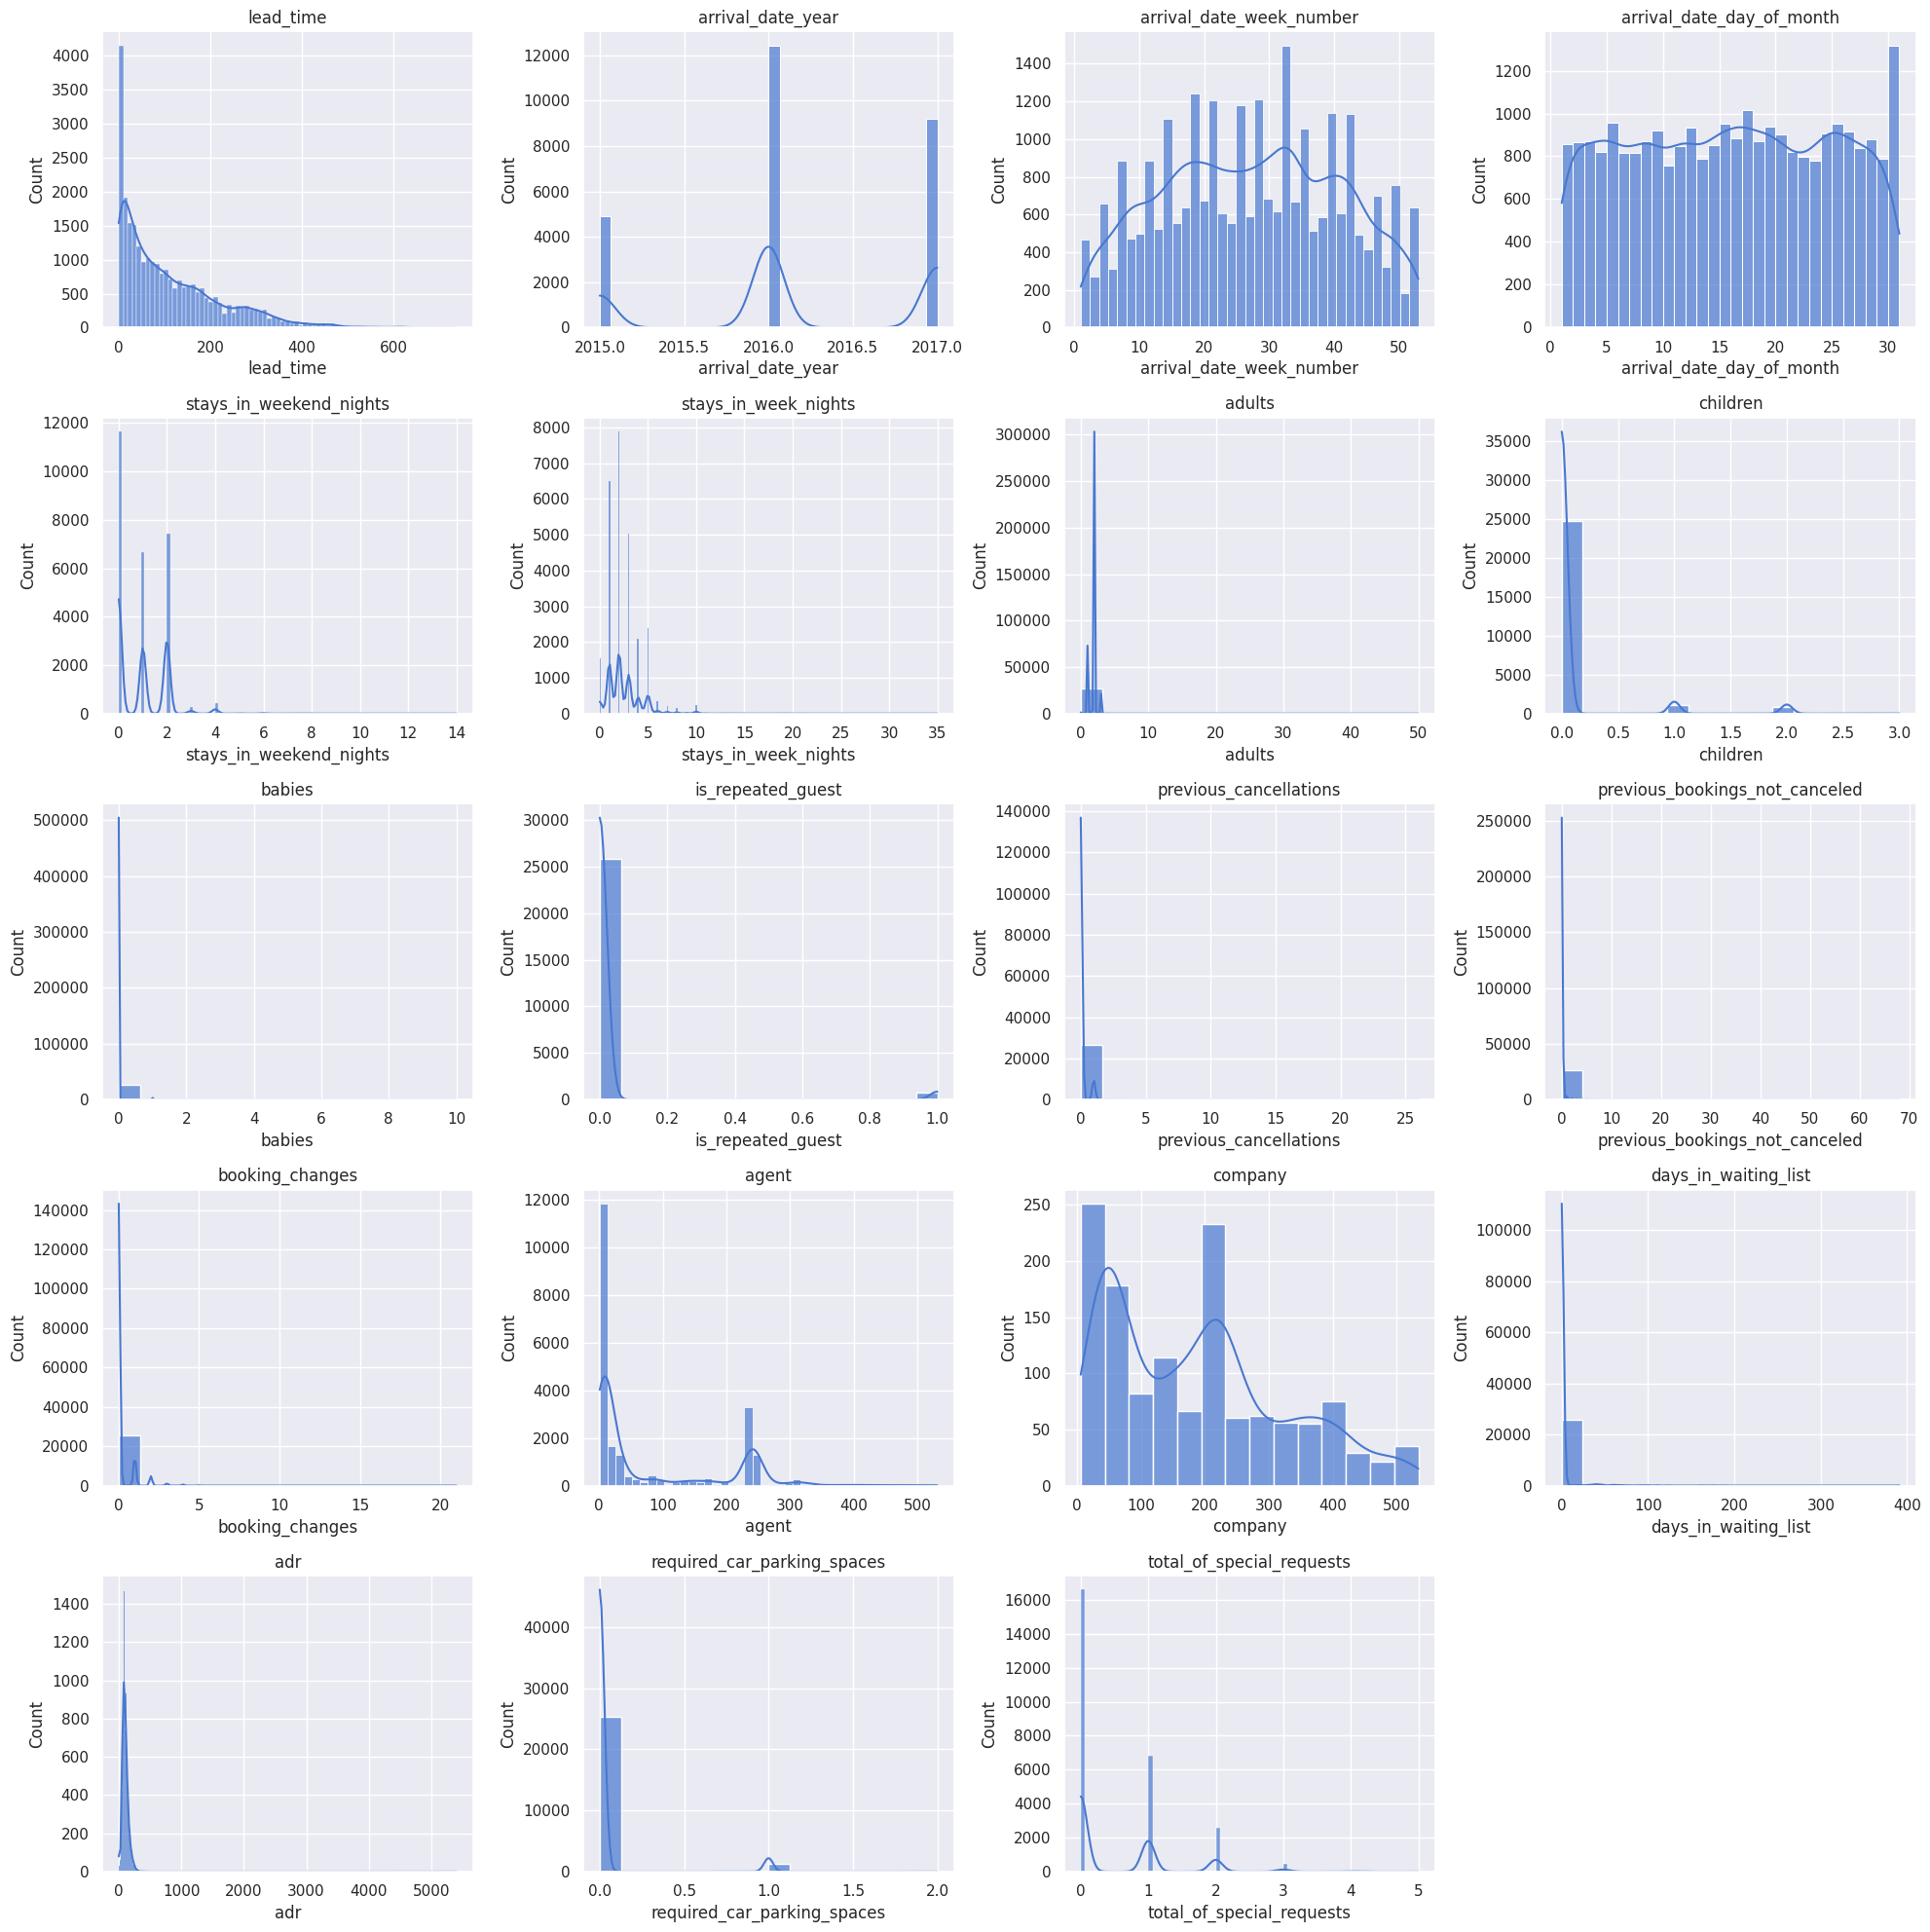

In [ ]:
plotKDE(numeric_cols_hotels)

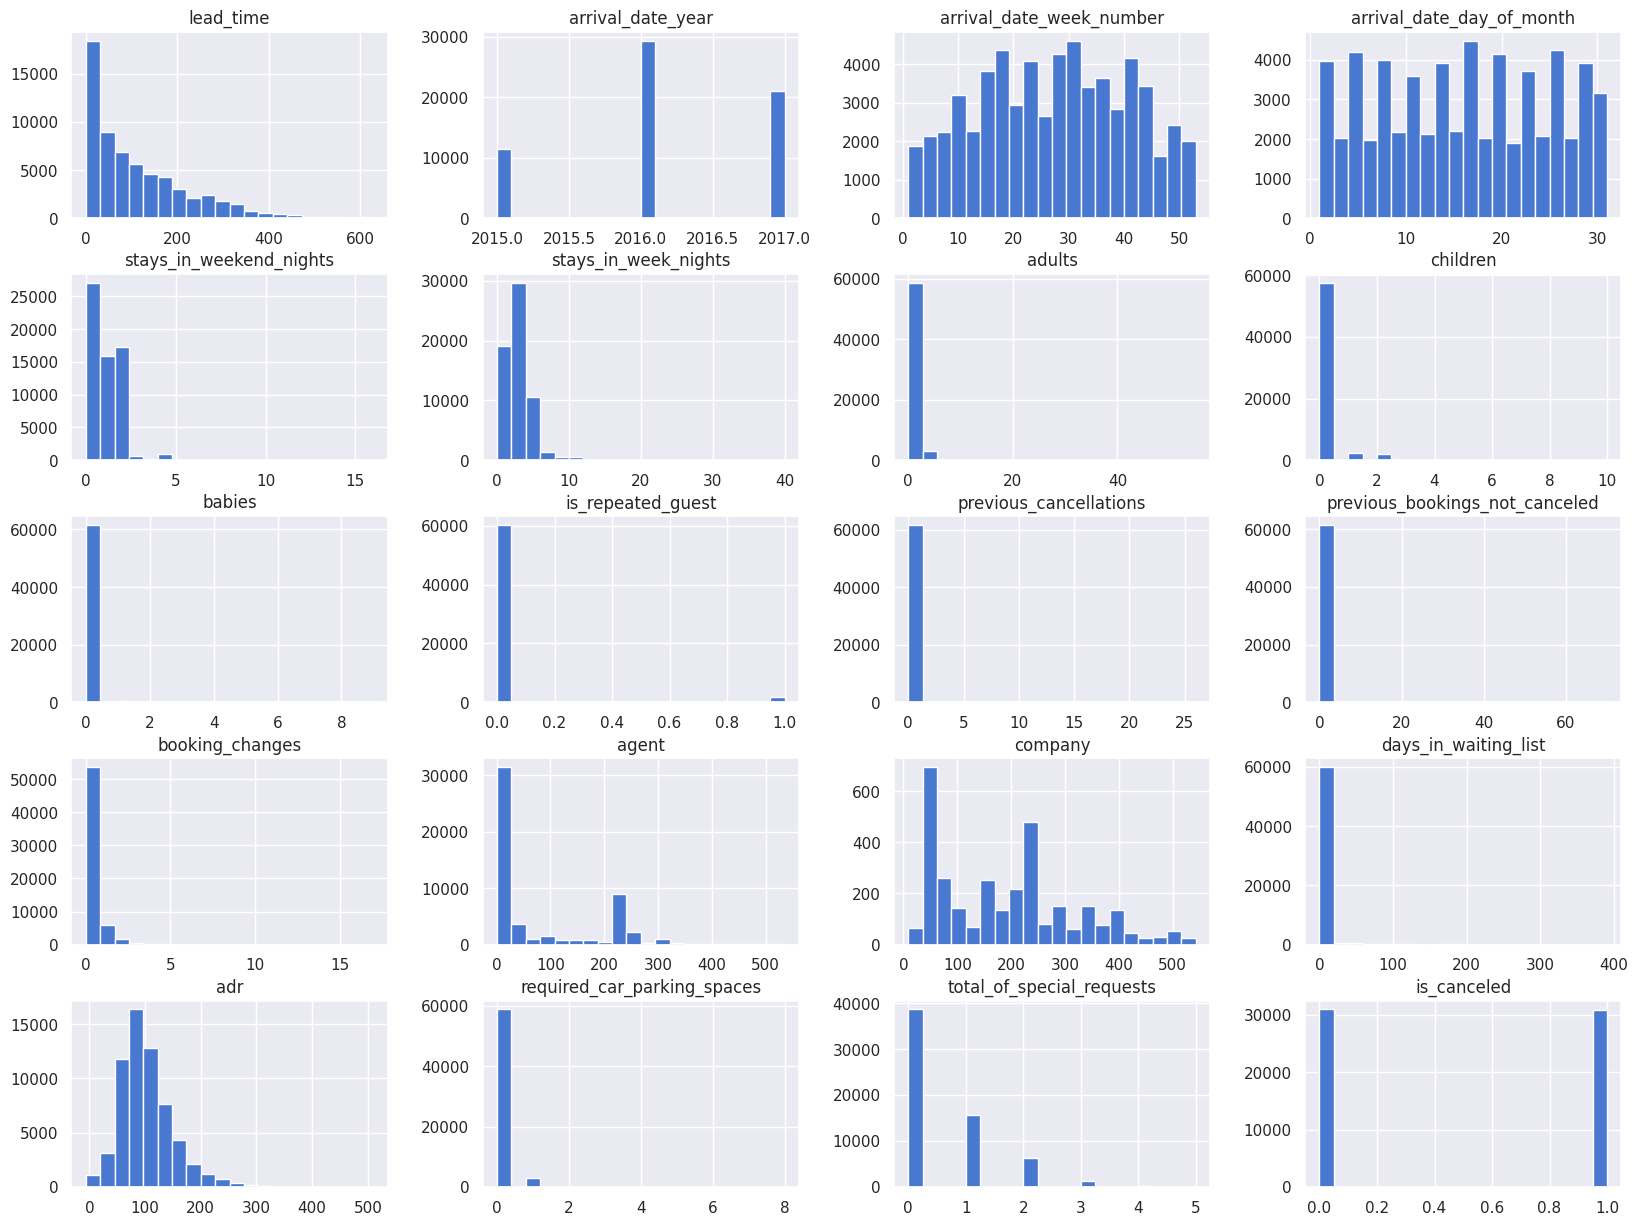

In [ ]:
numeric_cols_train = dataset_hotels_train.select_dtypes(include='number')

# Plot histograms of numeric columns
numeric_cols_train.hist(bins=20, figsize=(20,15))
plt.show()

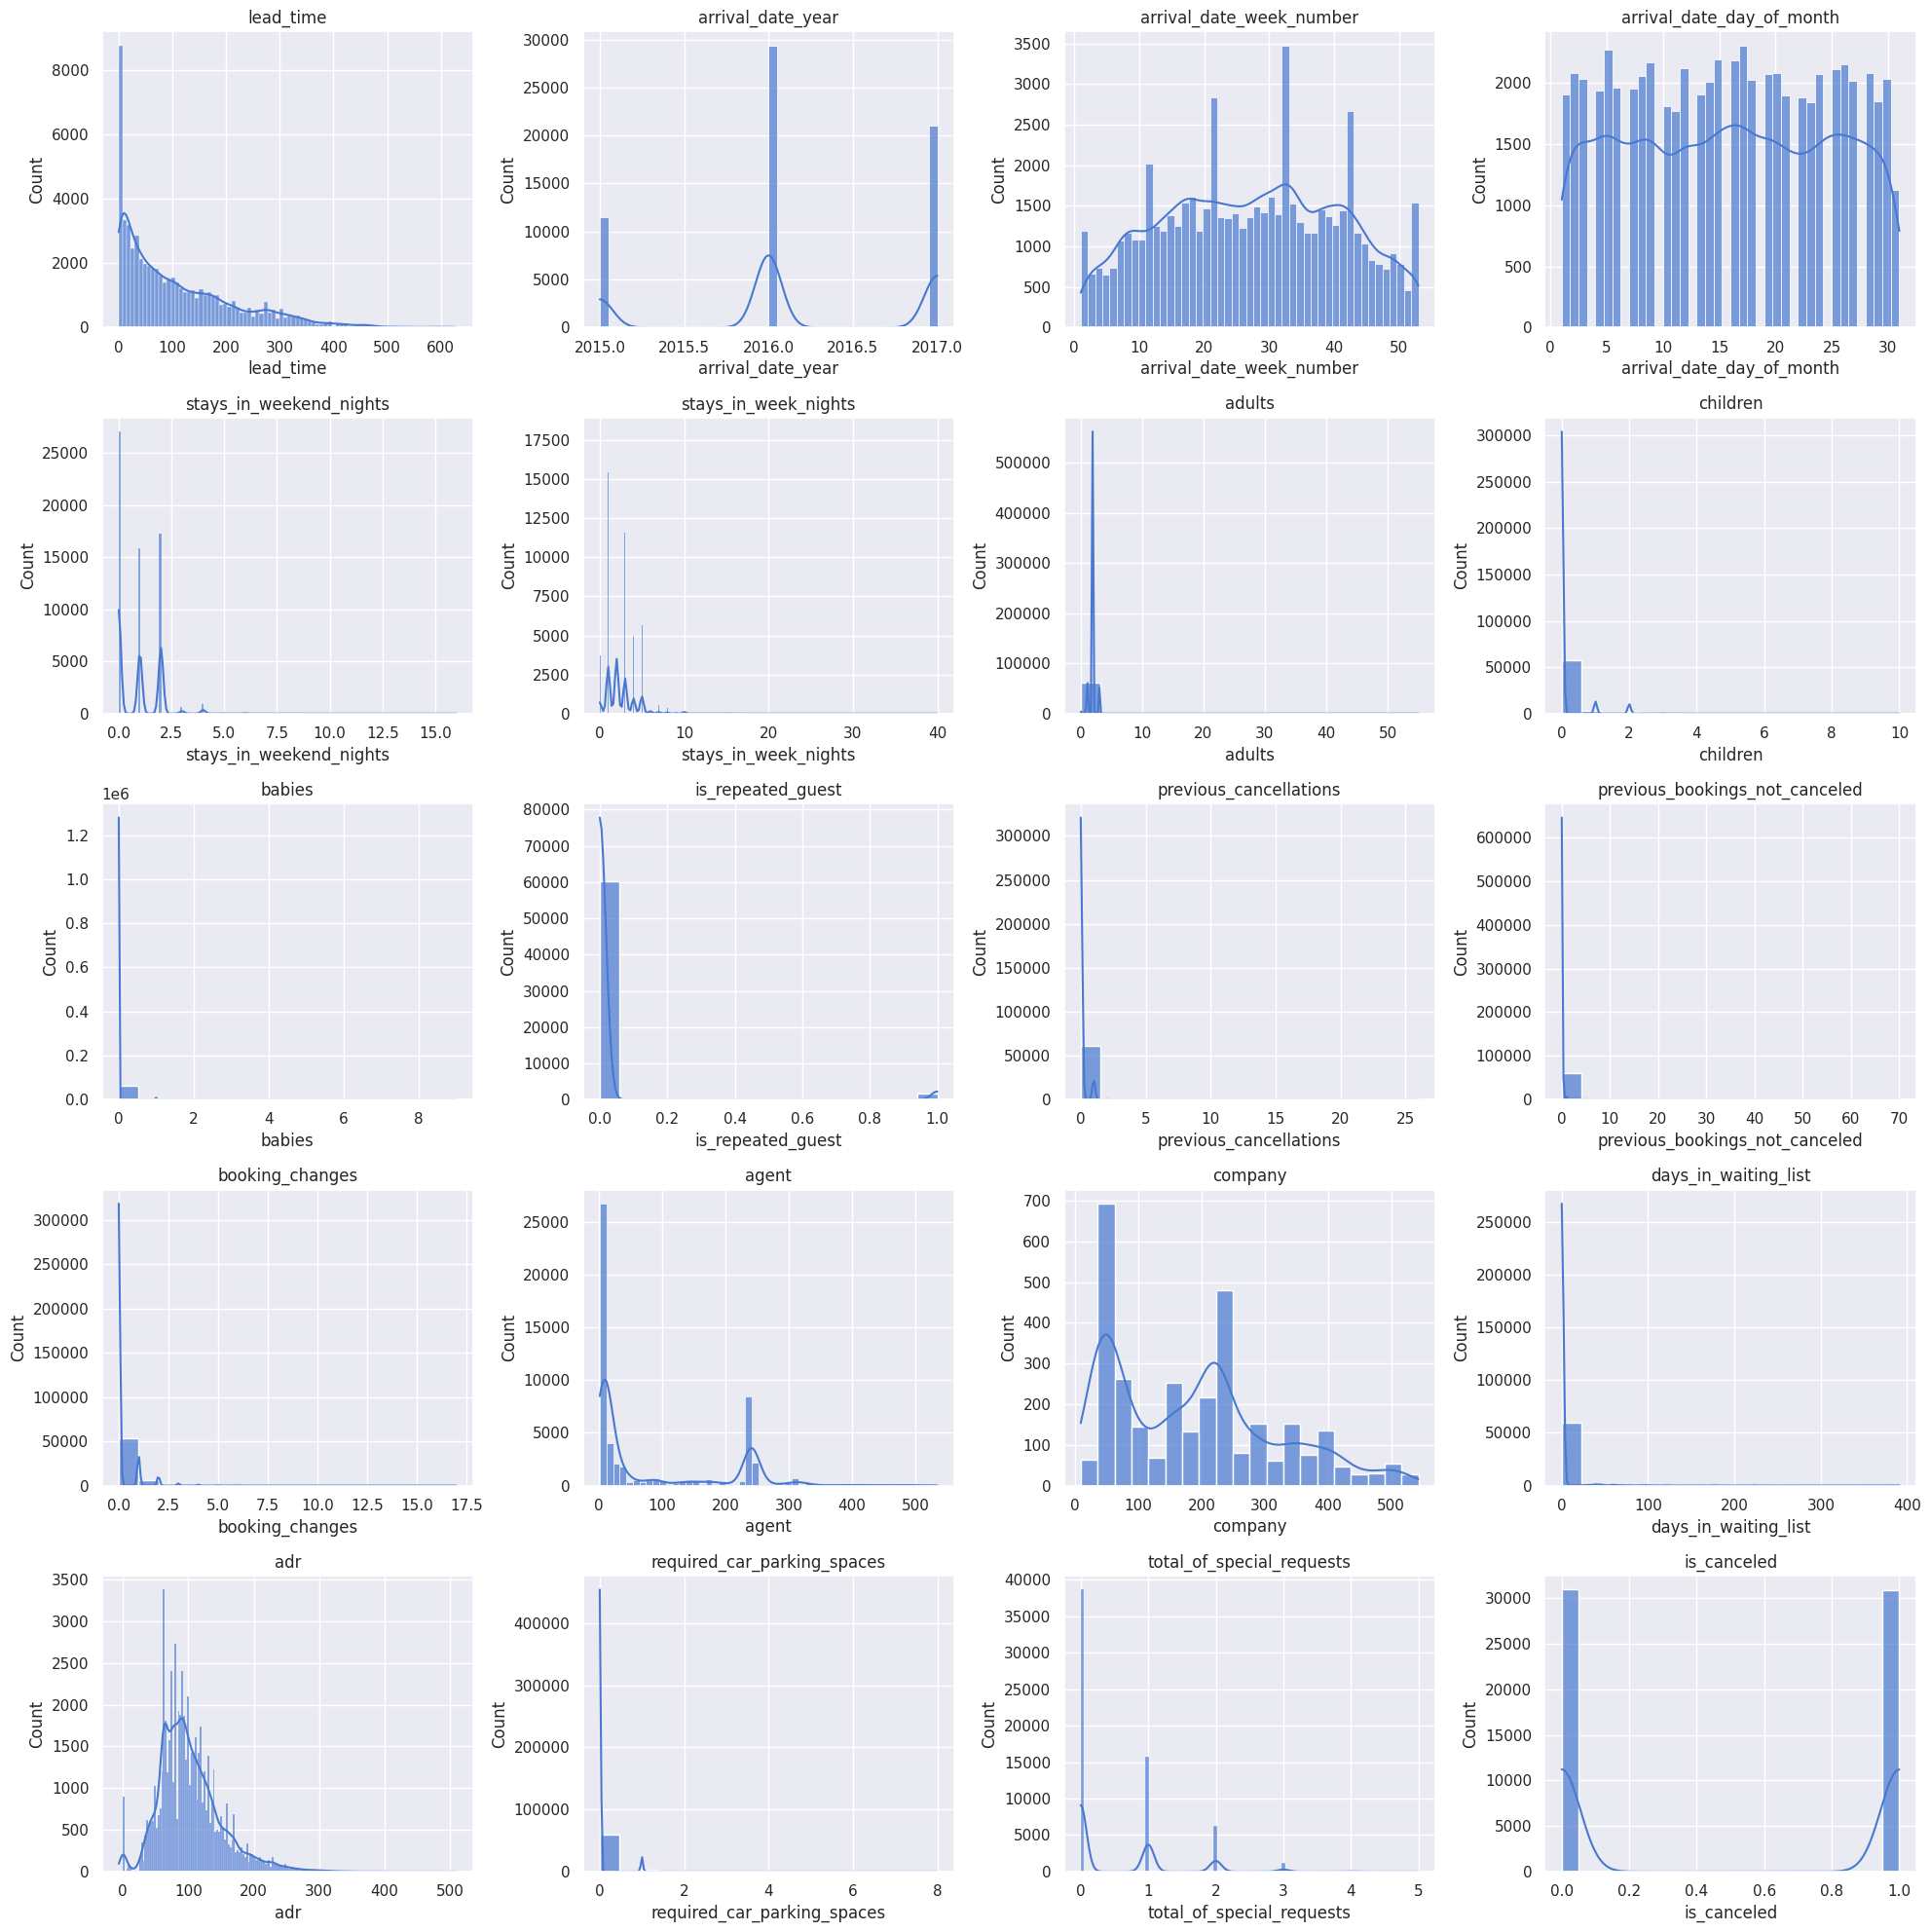

In [ ]:
import seaborn as sns
plotKDE(numeric_cols_train)

# b) Visualización de datos: 

##Gráficos de countplot para variables cualitativas: 

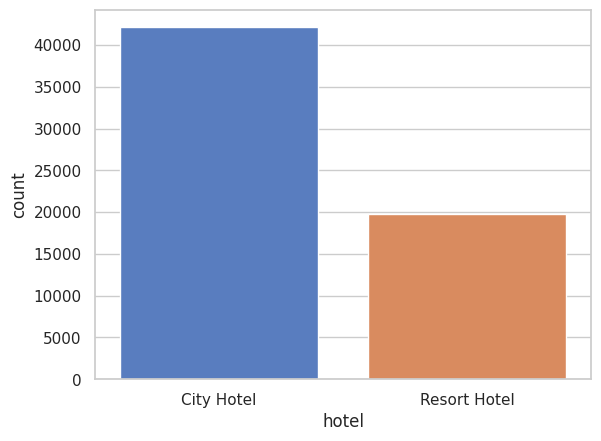

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='hotel', data=dataset_hotels_train)
plt.show()

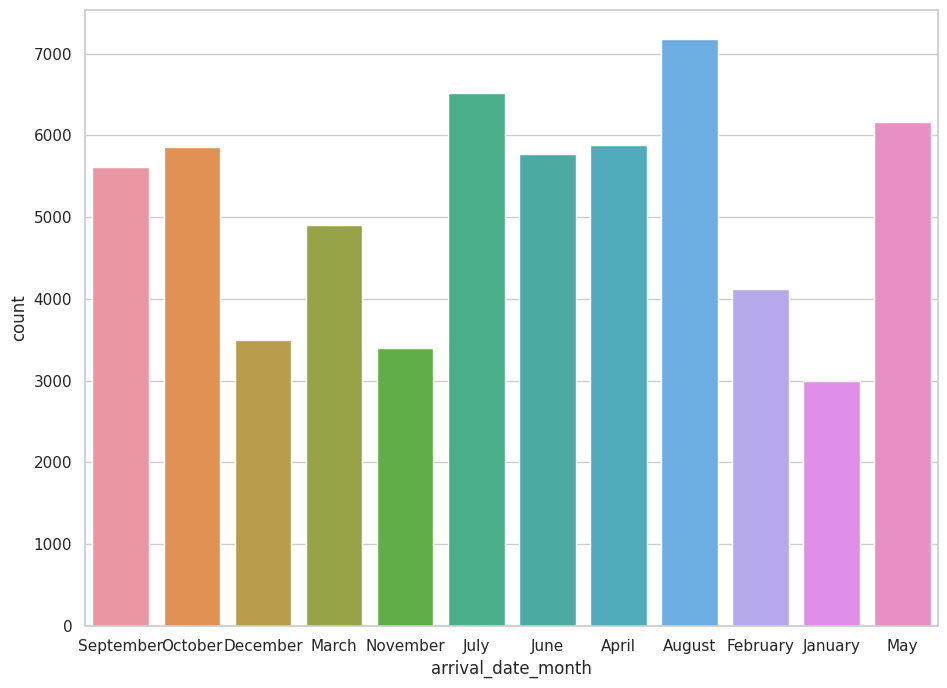

In [ ]:
plt.figure(figsize=(11,8))
sns.countplot(x='arrival_date_month', data=dataset_hotels_train)
plt.show()

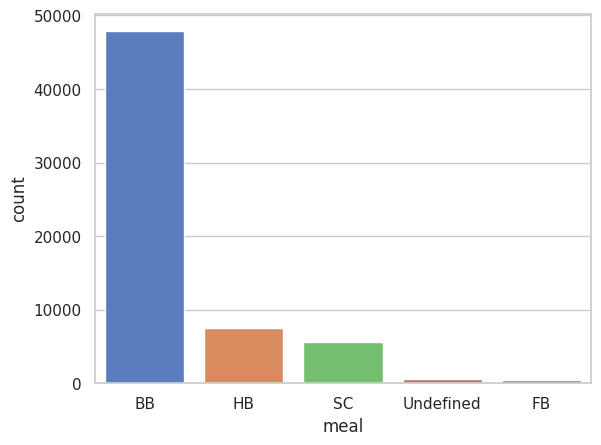

In [ ]:
sns.countplot(x='meal', data=dataset_hotels_train)
plt.show()

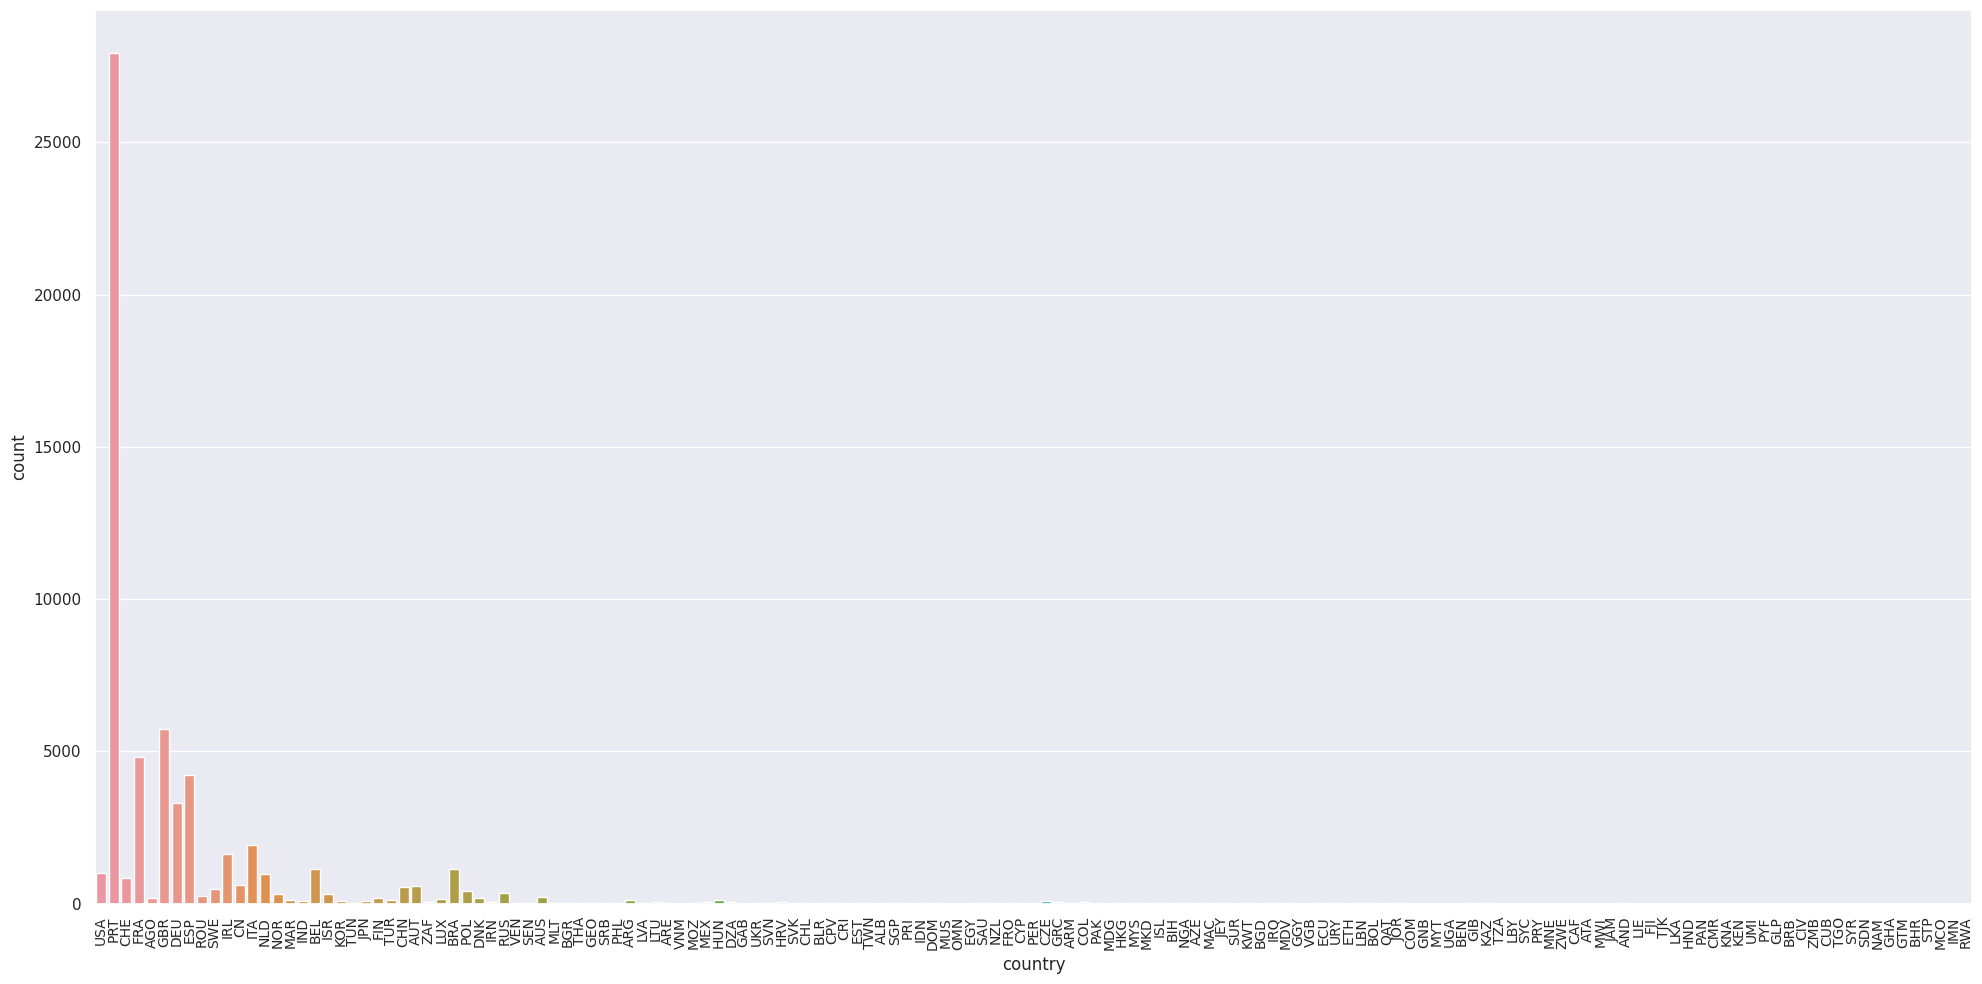

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=dataset_hotels_train)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

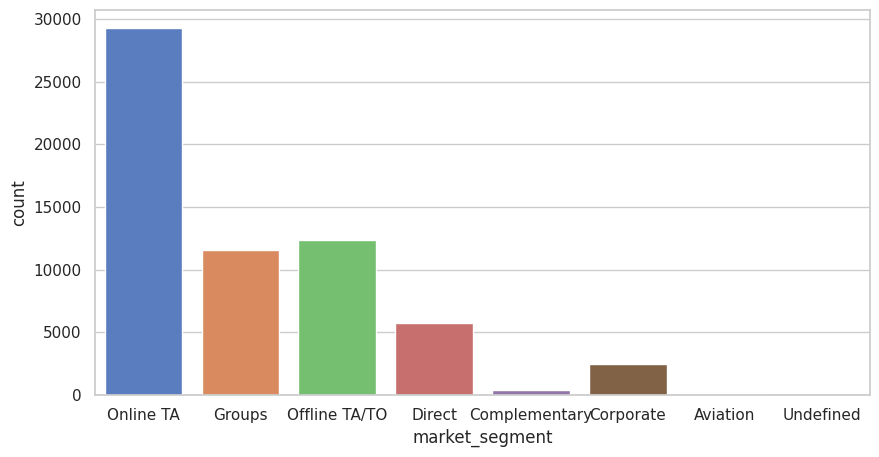

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='market_segment', data=dataset_hotels_train)
plt.show()

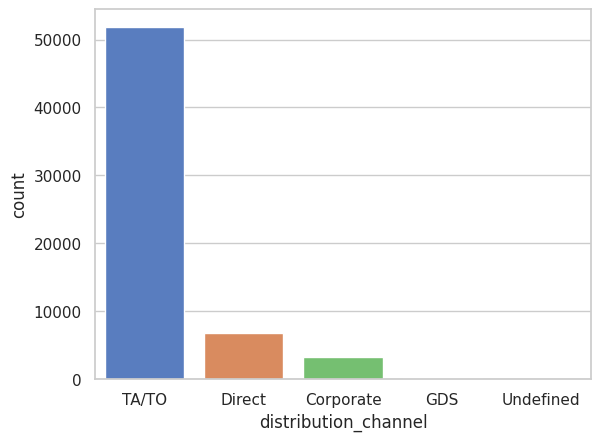

In [ ]:
sns.countplot(x='distribution_channel', data=dataset_hotels_train)
plt.show()

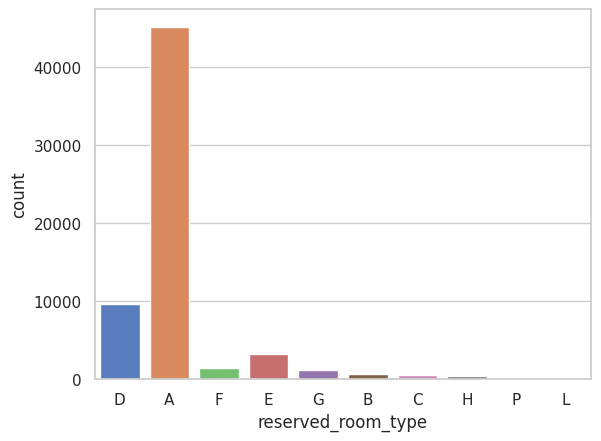

In [ ]:
sns.countplot(x='reserved_room_type', data=dataset_hotels_train)
plt.show()

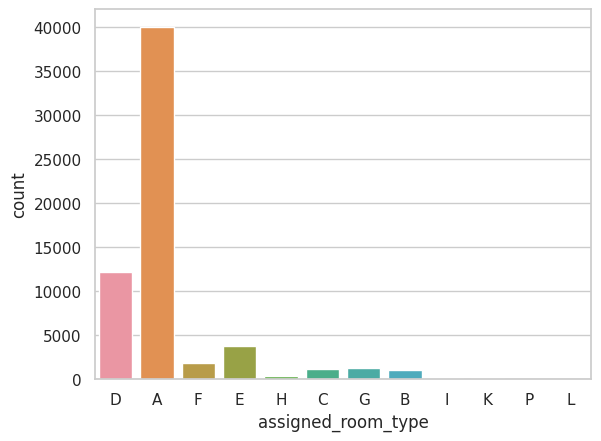

In [ ]:
sns.countplot(x='assigned_room_type', data=dataset_hotels_train)
plt.show()

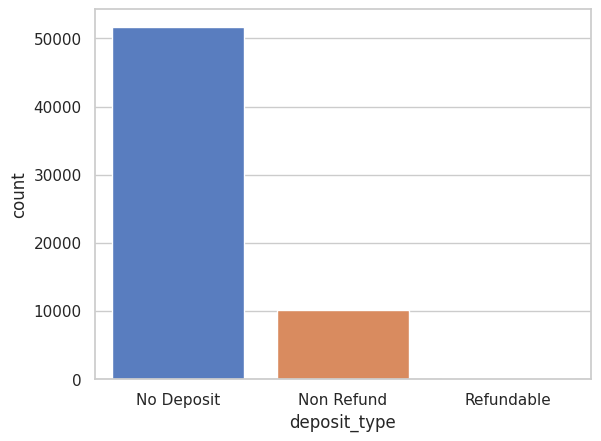

In [ ]:
sns.countplot(x='deposit_type', data=dataset_hotels_train)
plt.show()

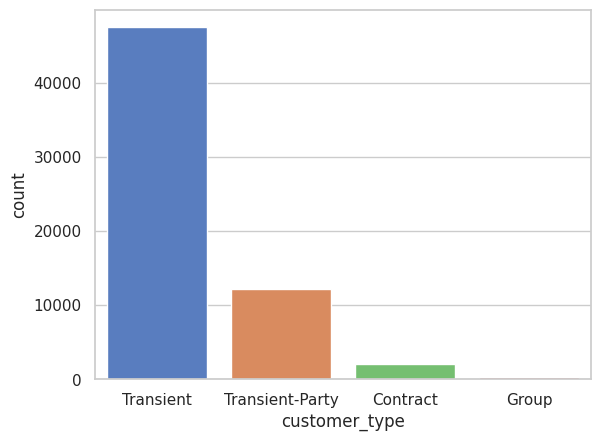

In [ ]:
sns.countplot(x='customer_type', data=dataset_hotels_train)
plt.show()

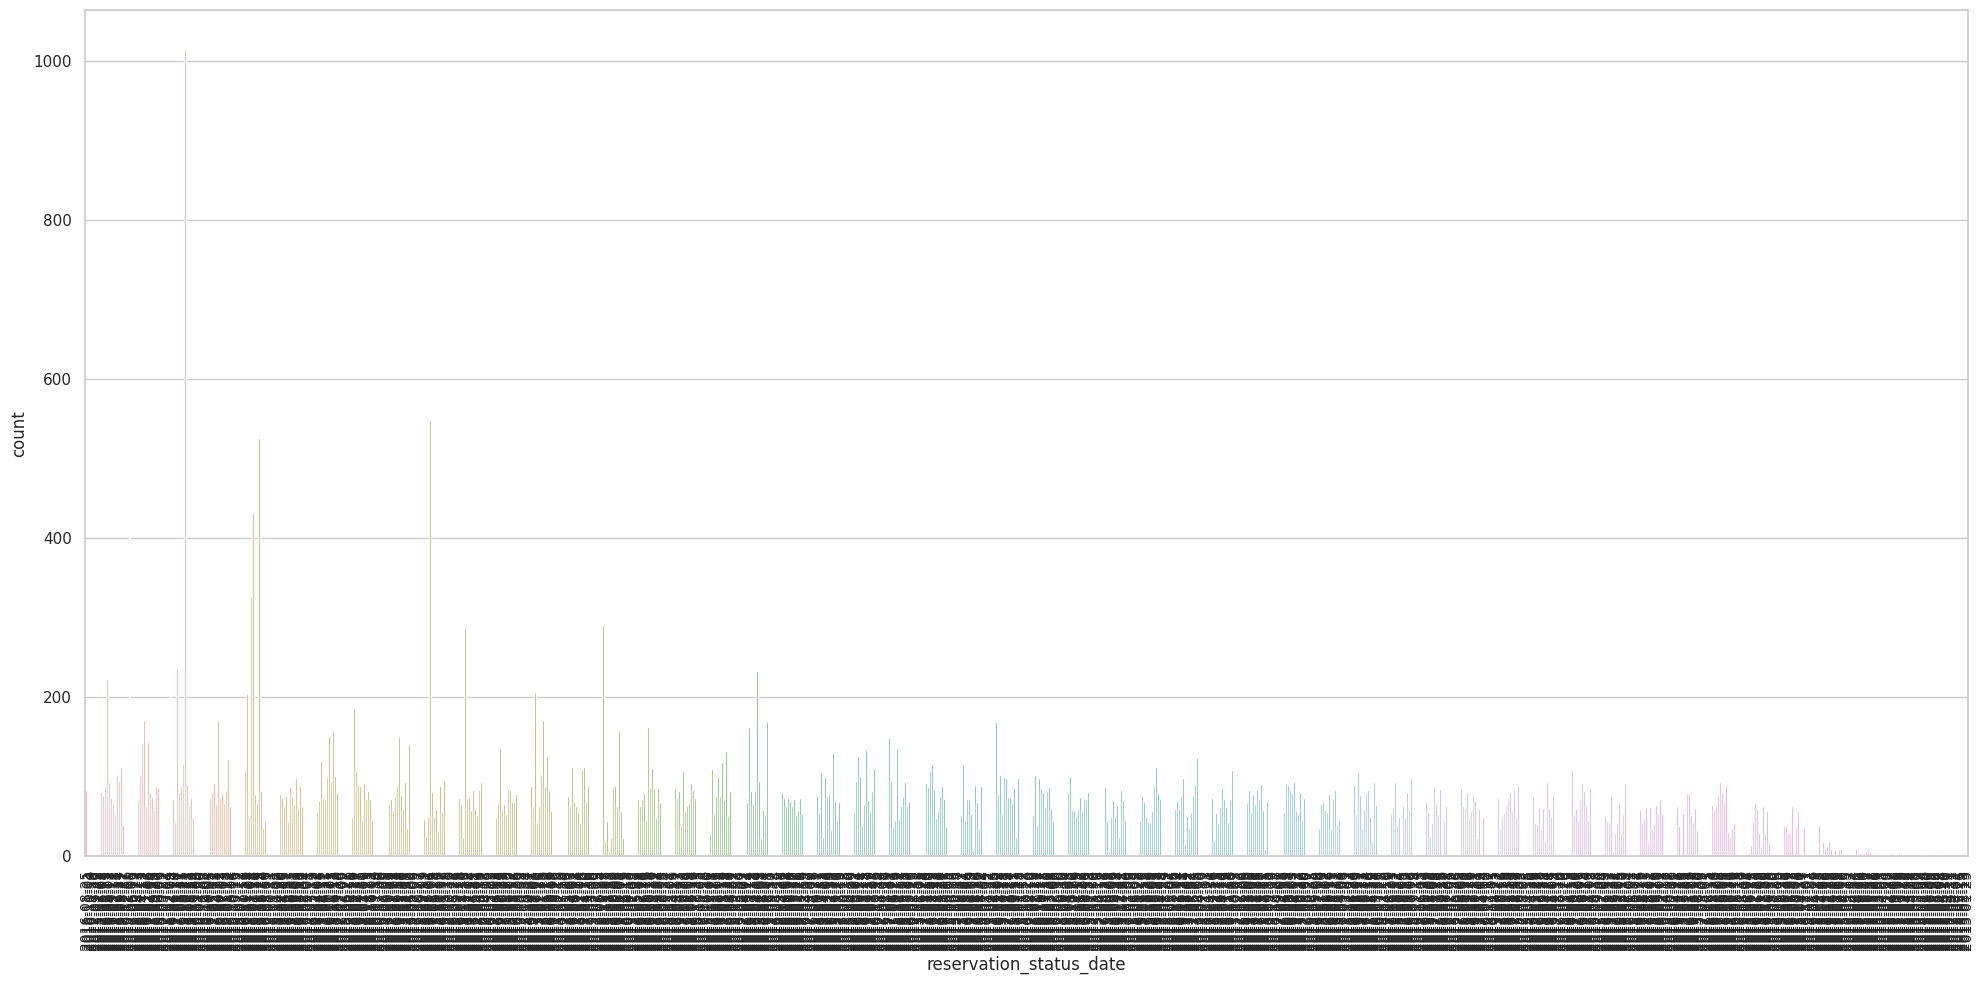

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='reservation_status_date', data=dataset_hotels_train)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Conclusion: Las variables 'reservation_status_date' y 'id' son INGRAFICABLES producto de lo largo que son lo largo que son cada uno de sus datos o de la cantidad que tienen (Para el caso de la variable 'id', ocurre ambos casos).

##Gráfico de heatmap para las correspondientes correlaciones:

Para el dataset de hotels_train:

<Axes: >

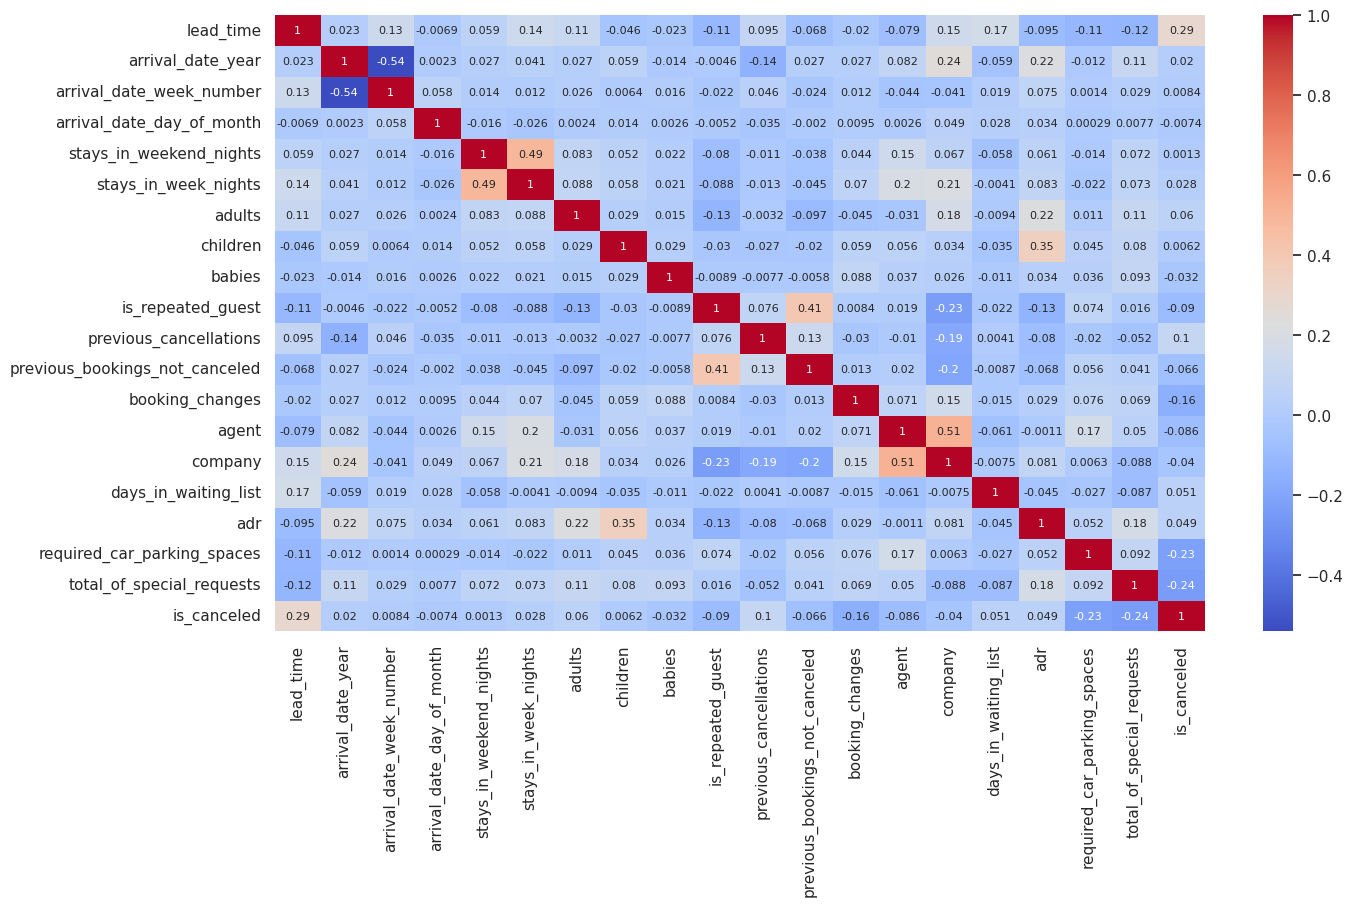

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset_hotels_train.corr(), annot = True, cmap='coolwarm', annot_kws={"fontsize":8})

Y para el del hotels_test (No se si habia que hacerlo pero lo hago por las dudas): 

<Axes: >

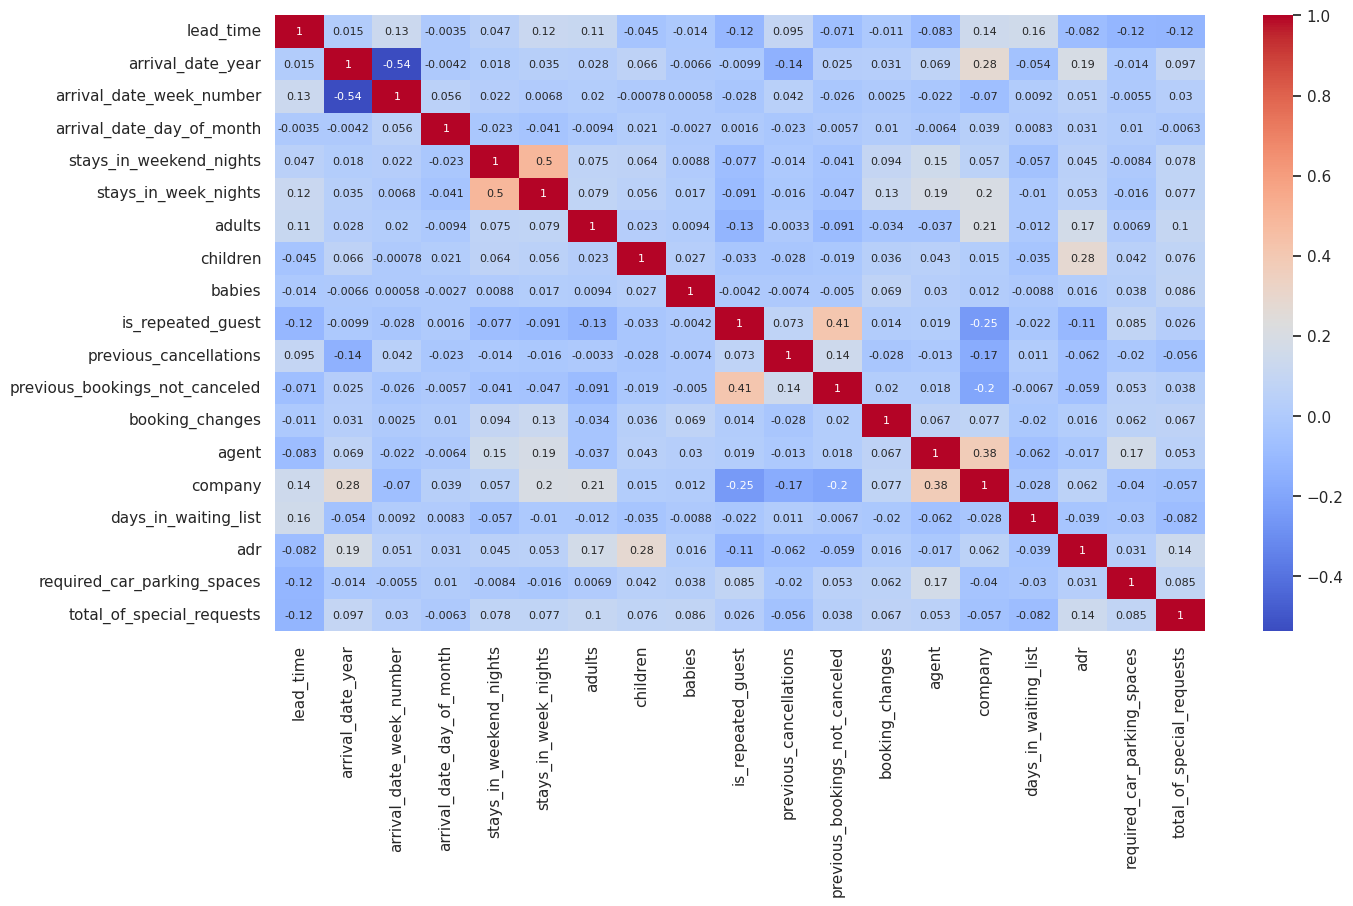

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset_hotels_test.corr(), annot = True, cmap='coolwarm', annot_kws={"fontsize":8})

#c) Datos Faltantes :

##Analizamos los datos faltantes a nivel columna.

### Primero vamos a imprimir la cantidad de datos faltantes por columna de manera ordenada: 

In [ ]:
def mostrar_nulos(nulos_por_columna):
  # Ordena las columnas por cantidad de datos faltantes de menor a mayor
  nulos_por_columna_ordenado = nulos_por_columna.sort_values(ascending=True)

  print("La cantidad de datos faltante por cada columna del dataset es:\n\n", nulos_por_columna_ordenado)

In [ ]:
nulos_por_columna_train = dataset_hotels_train.isna().sum()
mostrar_nulos(nulos_por_columna_train)

La cantidad de datos faltante por cada columna del dataset es:

 hotel                                 0
reservation_status_date               0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
id                                    0
is_repeated_guest                     0
market_segment                        0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
distribution_channel                  0
is_canceled    

In [ ]:
nulos_por_columna_hotels = dataset_hotels_test.isna().sum()
mostrar_nulos(nulos_por_columna_hotels)

La cantidad de datos faltante por cada columna del dataset es:

 hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
reservation_status_date               0
distribution_channel                  0
is_repeated_guest                     0
meal                                  0
babies                                0
children                              0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_week_number              0
arrival_date_mo

Hacemos esto, con el fin de saber que variables y cuales no graficar ya que no tiene sentido graficar el porcentaje a las variables que NO tienen valores faltantes.

###Ahora procedemos a calcular el porcentaje de datos faltantes de cada una de las variables que la poseen en función de la totalidad del dataset

####Para el dataset de entrenamiento:

(Aclaracion: Los graficos de una sola variable los hicimos porque no se ven en el grafico grande)

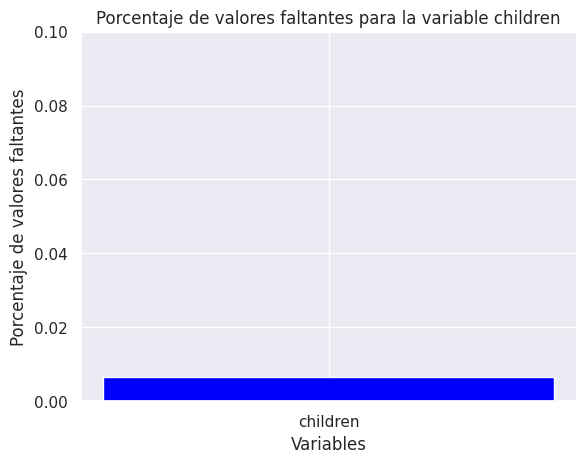

In [ ]:
#Para la variable children
missing_perc = dataset_hotels_train['children'].isna().sum() / len(dataset_hotels_train) * 100
missing_perc
fig,ax = plt.subplots()
ax.bar('children',missing_perc,color="blue")
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores faltantes')
ax.set_title('Porcentaje de valores faltantes para la variable children')
plt.ylim([0, 0.1])
plt.show()

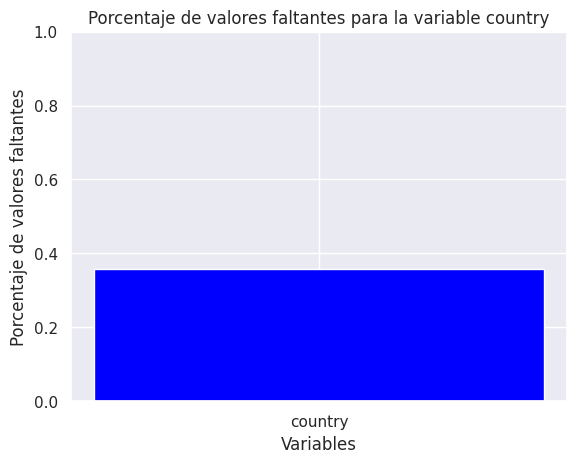

In [ ]:
#Para la variable country
missing_perc = dataset_hotels_train['country'].isna().sum() / len(dataset_hotels_train) * 100
missing_perc
fig,ax = plt.subplots()
ax.bar('country',missing_perc,color="blue")
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores faltantes')
ax.set_title('Porcentaje de valores faltantes para la variable country')
plt.ylim([0, 1])
plt.show()

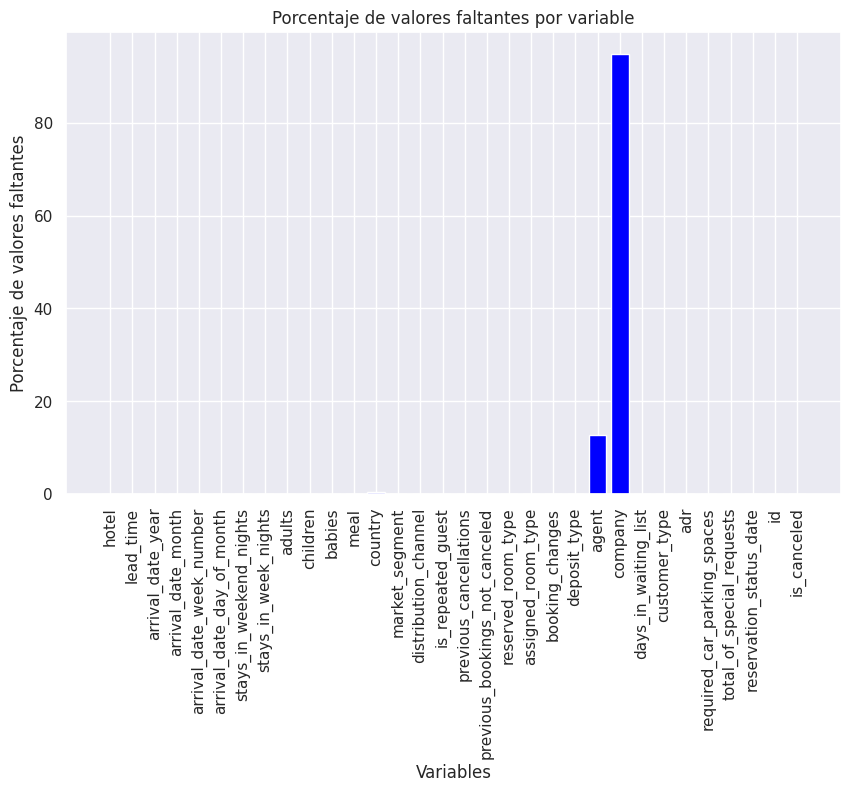

In [ ]:
#Para las variables 
missing_perc = dataset_hotels_train.isna().sum() / len(dataset_hotels_train) * 100
fig, ax = plt.subplots()
ax.bar(missing_perc.index, missing_perc.values, color='blue')
ax.set_title('Porcentaje de valores faltantes por variable')
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores faltantes')
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(10, 6)
plt.show()

Aclaración: Para las variables 'children'y 'country', les hice un gráfico aparte ya que el porcentaje de datos faltan es tan chico que ni figura en un gráfico general.

####Para el dataset de test:

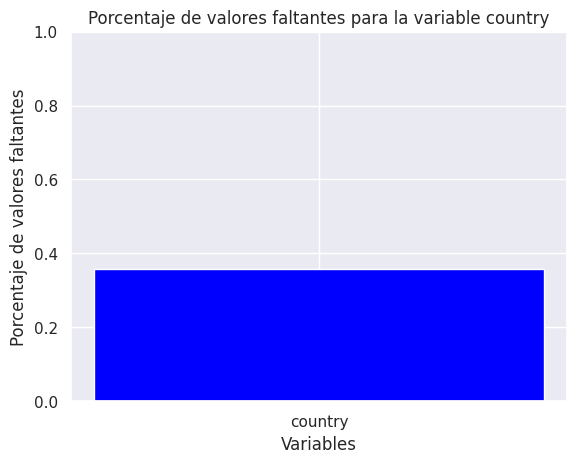

In [ ]:
#Para la variable country
missing_perc = dataset_hotels_test['country'].isna().sum() / len(dataset_hotels_test) * 100
missing_perc
fig,ax = plt.subplots()
ax.bar('country',missing_perc,color="blue")
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores faltantes')
ax.set_title('Porcentaje de valores faltantes para la variable country')
plt.ylim([0, 1])
plt.show()

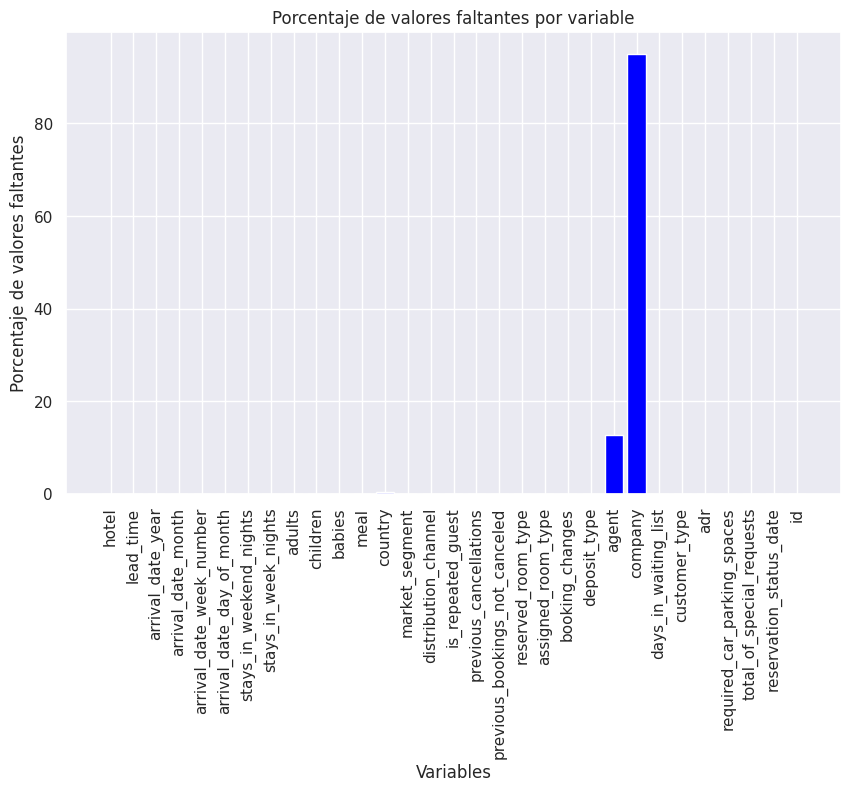

In [ ]:
#Para agent y company
missing_perc = dataset_hotels_test.isna().sum() / len(dataset_hotels_test) * 100
fig, ax = plt.subplots()
ax.bar(missing_perc.index, missing_perc.values, color='blue')
ax.set_title('Porcentaje de valores faltantes por variable')
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores faltantes')
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(10, 6)
plt.show()

Este dataset, tiene valores raros? Vamos a analizar:

In [ ]:
tienen_caracter_raro = dataset_hotels_train.astype('str').eq('-').any(0)
tienen_caracter_raro

Por suerte, no tiene ninguno

Analizamos si hay la presencia de duplicados: 

In [ ]:
dataset_hotels_train[dataset_hotels_train.duplicated(keep=False)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled


In [ ]:
dataset_hotels_train_

##Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de valores, eliminación de registros incompletos, etc. (Respuesta)

### Para los valores faltanes del dataset de trains tenemos:<br> 
children: 4<br>  country: 221<br> agent: 7890<br>  company: 58761<br> 
Asi que los de children directamente podemos hacer dropna(), no afecta mucho si perdemos algun dato en las filas que eliminemos, dado que son muy pocas las filas <br>

Para el country, podemos hacer un fillna() con un nuevo valor "Unknown" para indicar que no se conoce el country, y asi no eliminamos demasiados datos.

Para el agent, podemos hacer un fillna() con un nuevo valor "Ninguno" para indicar que no lo haya reservado un agent. o en el caso de que siempre deba ser reservado por un agente y solamanete faltan esos datos, podemos hacer lo mismo que con country y hacer fillna() con "Unknown".

Para company es otro caso, dado que faltan en casi todas las filas, asi que podemos rellenar o con  "Ninguno" o si se supopne que hay pero no se conoce, con "Unknown".

Procedemos a realizar los cambios correspondientes:

In [ ]:
dataset_hotels_train = dataset_hotels_train.dropna(subset=['children'])

In [ ]:
dataset_hotels_train.shape

In [ ]:
dataset_hotels_train['country'] = dataset_hotels_train['country'].fillna('Unknown/Desconocido')

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna('None/Ninguno')

In [ ]:
dataset_hotels_train['company'] = dataset_hotels_train['company'].fillna('Ninguno/None')

Mostramos como queda el dataset con todas las modificaciones que hicimos: 

In [ ]:
dataset_hotels_train

Ahora haremos lo mismo para el dataset de test

In [ ]:
dataset_hotels_test['country'] = dataset_hotels_test['country'].fillna('Unknown/Desconocido')

In [ ]:
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna('None/Ninguna')

In [ ]:
dataset_hotels_test['company'] = dataset_hotels_test['company'].fillna('Ninguno/None')

Para las distribuciones es hacer lo mismo que hice antes, solo que unicamente con las columnas que cambiamos

### Para los valores faltanes del dataset de test tenemos:<br> 
country: 95<br> agent: 3363<br>  company: 25218<br> 

Es bastante parecido al otro <br>

Para el country, podemos hacer un fillna() con un nuevo valor "Unknown" para indicar que no se conoce el country, y evitamos eliminamar demasiados datos.

Para el agent, al igual que en caso anterior, podemos hacer un fillna() con un nuevo valor "Ninguno" para indicar que no lo haya reservado un agent. o en el caso de que siempre deba ser reservado por un agente y solamanete faltan esos datos, podemos hacer lo mismo que con country y hacer fillna() con "Unknown".

Para company es otro caso, dado que faltan en casi todas las filas, asi que podemos rellenar o con  "Ninguno" o si se supopne que hay pero no se conoce, con "Unknown".

Procedemos a realizar los cambios correspondientes:

#d) Valores atípicos


### Graficos Boxplots

In [ ]:
numeric_columns = dataset_hotels_train.select_dtypes(exclude=['object'])

# Crear un boxplot para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=numeric_columns, x=column)
    plt.title(f'Boxplot de la columna "{column}"')
    plt.show()

### Este codigo encuentra cuantos valores atipicos hay, y cuales son esos valores de forma univariada

In [ ]:
df = numeric_columns

In [ ]:
# Obtener los percentiles 25 y 75 de cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Identificar los valores atípicos  
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Cuenta los valores atípicos en cada columna
outliers_count = outliers.sum()

# Obtener los valores atípicos y sus valores únicos
outliers_values = {}
for col in outliers.columns:
    col_outliers = outliers[outliers[col]].index
    col_values = df.loc[col_outliers, col].unique()
    outliers_values[col] = col_values

# Crear una tabla con los resultados
outliers_table = pd.DataFrame({'Valores_atipicos': outliers_count, 'Valores_unicos': outliers_values})

# Mostrar la tabla de valores atípicos
print(outliers_table)

### Y para el analisis multivariado 

In [ ]:
from sklearn.ensemble import IsolationForest

# Obtener las columnas numéricas del dataframe
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# Crear una instancia de Isolation Forest y ajustarla al dataframe
isof = IsolationForest(n_estimators=100, contamination=0.01)
isof.fit(numeric_columns)

# Identificar los valores atípicos
is_outlier = isof.predict(numeric_columns) == -1

# Crear un dataframe con los valores atípicos y la información correspondiente
outliers_df = pd.DataFrame(columns=["column", "outlier_value", "row_number"])

for col in numeric_columns.columns:
    outliers = numeric_columns.loc[is_outlier, col]
    if not outliers.empty:
        rows = numeric_columns.loc[is_outlier, col].index
        df_temp = pd.DataFrame({
            "column": col,
            "outlier_value": outliers,
            "row_number": rows
        })
        outliers_df = pd.concat([outliers_df, df_temp], ignore_index=True)

outliers_df.sort_values(["column", "row_number"], inplace=True)
outliers_df.reset_index(drop=True, inplace=True)

print(outliers_df)

Hay alguno valores outliers que son un error, como puede ser el adress que es 96.67, lo cual no es posible. Para este tipo de errores podemos o eliminarlo, o corregirlo redondeandolo para arriba o para abajo, o podemos dejarlo si pensamos que no hara daño.

Los otros outliers, tambien podemos dejarlos, o tambien podemos reemplazarlos con un valor razonable que se deduzca del resto de los valores de su tipo, pero no conviene eliminarlos, porque terminariamos eliminando demasiados datos y quizas estariamos haciendo mas daño del que estamos intententando prevenir.

Decidimos que seria lo mejor reemplazar los outliers que son error, y dejar los otros como estan.